<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Ridge_regression_key_understandings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=load_diabetes()

In [3]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.shape

(442, 11)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.2, random_state=2)

In [10]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [12]:
coefs=[]
r2_scores=[]

for i in [0,10,100,1000]:
  reg=Ridge(alpha=i)
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())
  y_pred=reg.predict(X_test)
  r2_scores.append(r2_score(y_test,y_pred))

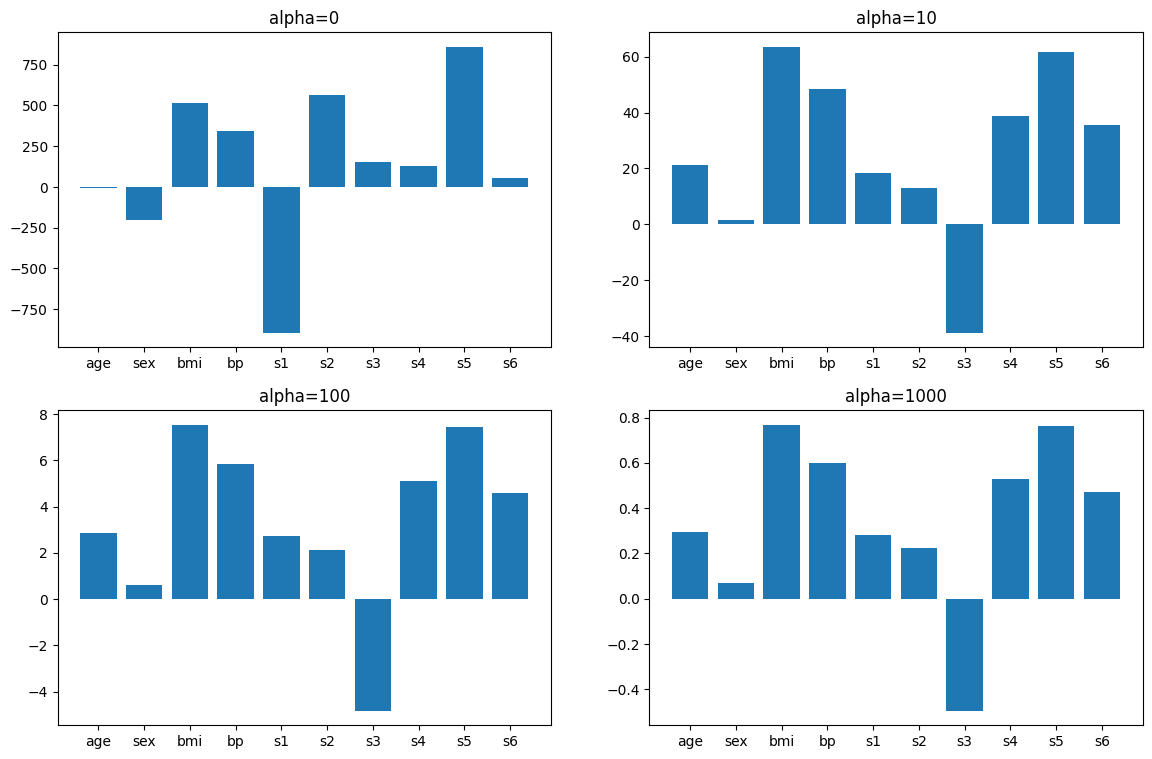

In [13]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('alpha=0')
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('alpha=10')
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('alpha=100')
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('alpha=1000')
plt.show()

In [ ]:
#lambda ka value bada karne pe value zero(0) ke paass ayenge but 0 nahi honge

In [16]:
#effect of regularizarion on loss function
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_informative=1,n_features=1,noise=20,random_state=13) # Changed 'random_State' to 'random_state'

[27.82809103] -2.29474455867698


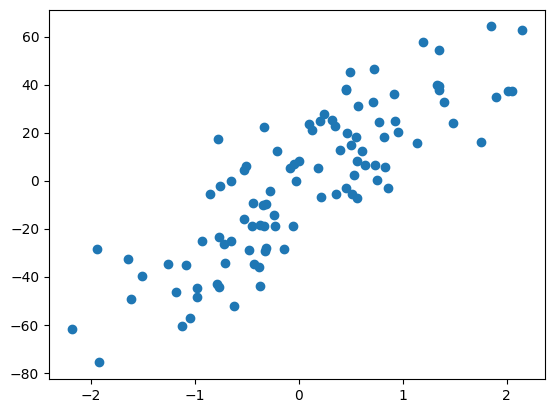

In [17]:
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
print(reg.coef_,reg.intercept_)

In [18]:
def cal_loss(m,alpha):
  return np.sum((y-(m*X.ravel()+2.29)**2)+alpha*m*m)

In [19]:
def predict(m):
  return m*X-2.29

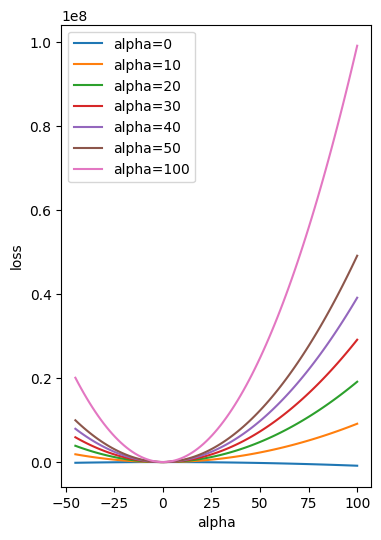

In [21]:
m=np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
  loss=[]
  for i in range(m.shape[0]):
    loss_i=cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label='alpha={}'.format(j))
plt.legend()
plt.xlabel('alpha')
plt.ylabel('loss')
plt.show()

In [ ]:
#why ridge=the point of circle in end of the perimeter
#when apply Regression=column is more than 2